In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Імпортую датасет

In [4]:
data = './input/adult.csv'
df = pd.read_csv(data, header=None, sep=",\s", engine="python")

Переглядаю зміст

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Ми бачимо, що в наборі даних відсутні коректні назви стовпців – вони позначені лише числами 0, 1, 2 і так далі. Необхідно присвоїти стовпцям відповідні назви.

In [6]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = column_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Переглядаю загальну інформацію про датасет

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Ми бачимо, що в наборі даних відсутні пропущені значення. У ньому є суміш категоріальних і числових змінних. Категоріальні змінні мають тип даних object, тоді як числові змінні мають тип даних int64. Давайте спершу розглянемо категоріальні змінні.

In [9]:
categorical = [column for column in df.columns if df[column].dtype == 'object']
print(f'There are {len(categorical)} categorical variables\n')
print('The categorical variables are:\n\n', categorical)

There are 9 categorical variables

The categorical variables are:

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [10]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [11]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [12]:
for var in categorical: print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      


Ми бачимо, що деякі змінні, такі як workclass, occupation та native_country, містять відсутні значення, позначені як "?". Зазвичай відсутні значення кодуються як NaN, і Python може виявити їх за допомогою стандартної команди df.isnull().sum(). Однак у цьому випадку відсутні значення представлені як "?", і Python не вважає їх відсутніми. Тому потрібно замінити "?" на NaN, щоб Python міг коректно виявити ці відсутні значення.

In [14]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native_country'] = df['native_country'].replace('?', np.nan)

In [15]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [16]:
numerical = [column for column in df.columns if df[column].dtype != 'object']
print(f'There are {len(numerical)} numerical variables\n')
print('The numerical variables are:', numerical)

There are 6 numerical variables

The numerical variables are: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [17]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [18]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Далі ми видаляємо стовпець 'income' з даних, щоб створити матрицю ознак X, а сам стовпець 'income' виділяється як цільова змінна y. У результаті, X буде містити всі ознаки, які використовуються для прогнозування, а y — значення, які модель повинна передбачити.

In [19]:
X = df.drop(['income'], axis=1)
y = df['income']

Розділяємо дані на окремі навчальні та тестові набори

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


Моделі машинного навчання зазвичай працюють із числовими даними, тому категоріальні змінні необхідно перетворити на числові значення, щоб модель могла їх коректно обробляти.

In [21]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for col in categorical:
    if col in X_train.columns:
        X_train[col] = label_enc.fit_transform(X_train[col])
        X_test[col] = label_enc.transform(X_test[col])

Далі виконуємо стандартизацію даних, яка забезпечує, що числові ознаки мають однаковий масштаб, що покращує продуктивність багатьох моделей машинного навчання, особливо для таких алгоритмів як SVM, де масштаби ознак можуть сильно впливати на результати

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

## Bayesian Classification

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

Обчислюємо необхідні метрики для оцінки результативності моделі.

In [25]:
recall_gnb = recall_score(y_test, y_pred_gnb, pos_label="<=50K")
f1_gnb = f1_score(y_test, y_pred_gnb, pos_label="<=50K")
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

In [26]:
print(f'Naive Bayes - Recall: {recall_gnb:.4f}, F1: {f1_gnb:.4f}, Accuracy: {accuracy_gnb:.4f}')

Naive Bayes - Recall: 0.9532, F1: 0.8815, Accuracy: 0.8056


1. **Recall**:  
   - **Value**: 0.9532  
   - **Interpretation**: Високий показник recall означає, що модель добре виявляє позитивні випадки класу "<=50K" і з високою ймовірністю їх знаходить.

2. **F1-Score**:  
   - **Value**: 0.8815  
   - **Interpretation**: Достатній показник F1-Score вказує на хорошу якість класифікації.

3. **Accuracy**:  
   - **Value**: 0.8056  
   - **Interpretation**: Модель правильно класифікує приблизно 81% усіх випадків, що свідчить про досить високу точність.


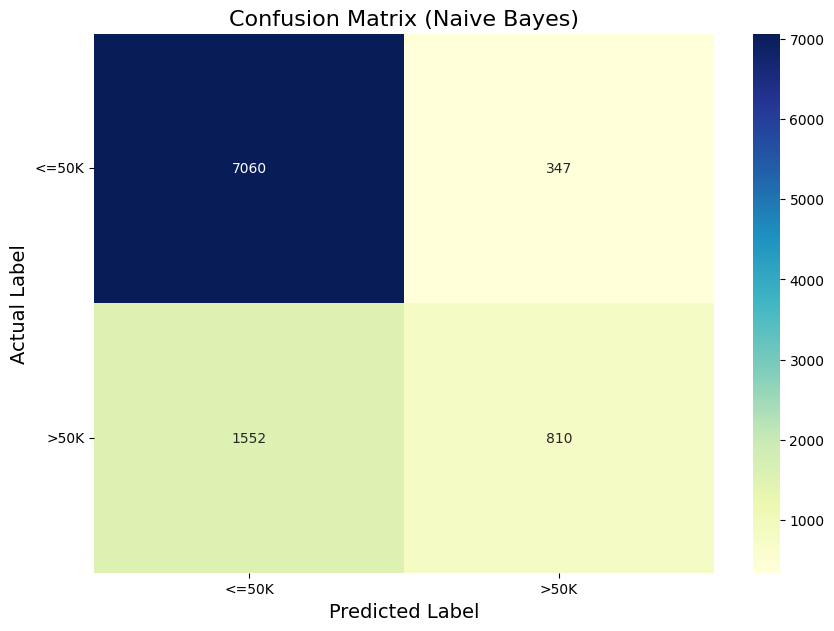

In [28]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_gnb_df = pd.DataFrame(cm_gnb, index=['<=50K', '>50K'], columns=['<=50K', '>50K'])

plt.figure(figsize=(10, 7))
sns.heatmap(cm_gnb_df, annot=True, fmt='g', cmap='YlGnBu', cbar=True)

plt.title('Confusion Matrix (Naive Bayes)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xticks(rotation=0) 
plt.yticks(rotation=0)
plt.show()

Загалом, модель демонструє хорошу точність у виявленні більшості випадків класу "<=50K". Проте, виникають деякі труднощі з точною класифікацією менш чисельного класу ">50K".

In [30]:
train_accuracy = gnb.score(X_train, y_train)
print(f'Training Set Accuracy: {train_accuracy:.4f}')

test_accuracy = gnb.score(X_test, y_test)
print(f'Test Set Accuracy: {test_accuracy:.4f}')

class_counts = y_test.value_counts()
null_accuracy = class_counts.max() / class_counts.sum()
print(f'Null Accuracy (Baseline): {null_accuracy:.4f}')

if train_accuracy > test_accuracy:
    print('Warning: The model may be overfitting to the training data.')
else:
    print('The model appears to be well-balanced between training and test data.')

Training Set Accuracy: 0.8035
Test Set Accuracy: 0.8056
Null Accuracy (Baseline): 0.7582
The model appears to be well-balanced between training and test data.


### Підсумок результатів:

- **Точність на навчальному наборі**: 0.8035  
  Модель добре класифікує дані, правильно передбачаючи 80.35% випадків.

- **Точність на тестовому наборі**: 0.8056  
  Подібна точність на тестових даних (80.56%), що вказує на гарну узагальнювальну здатність і відсутність перенавчання.

- **Нульова точність (базова)**: 0.7582  
  Модель перевершує базову нульову точність (75.82%), що свідчить про здатність виявляти значущі шаблони в даних.

- **Висновок**:  
  Модель виглядає збалансованою між навчальними і тестовими даними.


## SVM

Ініціалізуємо модель, навчаємо та прогнозуємо

In [31]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

Розраховуємо необхідні метрики для оцінки ефективності моделі

In [32]:
recall_svc = recall_score(y_test, y_pred_svc, pos_label="<=50K")
f1_svc = f1_score(y_test, y_pred_svc, pos_label="<=50K")
accuracy_svc = accuracy_score(y_test, y_pred_svc)

In [33]:
print(f'SVM - Recall: {recall_svc:.4f}, F1: {f1_svc:.4f}, Accuracy: {accuracy_svc:.4f}')

SVM - Recall: 0.9731, F1: 0.8893, Accuracy: 0.8164


Модель SVM показує чудові результати класифікації, з високим рівнем recall та високою точністю.

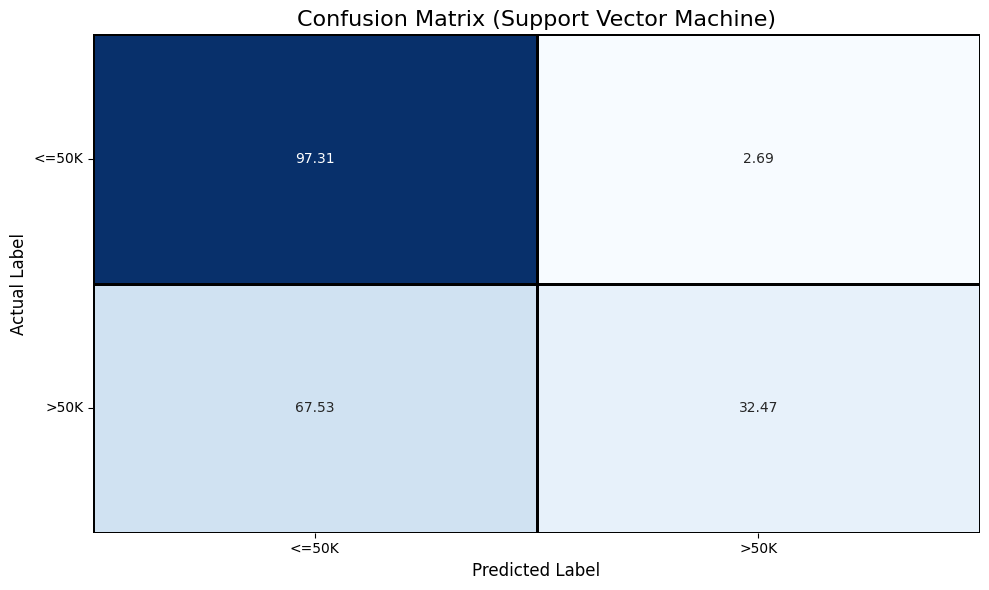

In [34]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc_df = pd.DataFrame(cm_svc, index=['<=50K', '>50K'], columns=['<=50K', '>50K'])

cm_svc_percentage = cm_svc / cm_svc.sum(axis=1).reshape(-1, 1) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(cm_svc_df, annot=cm_svc_percentage, fmt='.2f', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title('Confusion Matrix (Support Vector Machine)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [35]:
train_accuracy_svc = svc.score(X_train, y_train)
print(f'Точність на навчальному наборі (SVM): {train_accuracy_svc:.4f}')

test_accuracy_svc = svc.score(X_test, y_test)
print(f'Точність на тестовому наборі (SVM): {test_accuracy_svc:.4f}')

null_accuracy_svc = y_test.value_counts().max() / y_test.value_counts().sum()
print(f'Нульова точність (SVM): {null_accuracy_svc:.4f}')

if train_accuracy_svc > test_accuracy_svc:
    print('Модель SVM може бути перенавчена.')
else:
    print('Модель SVM збалансована і добре узагальнює.')

Точність на навчальному наборі (SVM): 0.8154
Точність на тестовому наборі (SVM): 0.8164
Нульова точність (SVM): 0.7582
Модель SVM збалансована і добре узагальнює.


Отже, модель SVM добре виконує свою роль і має надійну продуктивність на тестових даних

### Порівняння моделей: Naive Bayes та SVM

1. **Оцінка точності на навчальному наборі:**
   - **Naive Bayes**: Модель показала точність **0.8035** на навчальному наборі, що свідчить про гарне навчання, без перенавчання.
   - **SVM**: Точність моделі **SVM** на навчальному наборі становить **0.8154**, що свідчить про трохи кращу здатність моделі захоплювати патерни у даних порівняно з Naive Bayes.

2. **Оцінка точності на тестовому наборі:**
   - **Naive Bayes**: Точність на тестовому наборі **0.8056** показує, що модель добре узагальнює дані та працює на рівні з навчальними даними.
   - **SVM**: Модель **SVM** досягла точності **0.8164** на тестовому наборі, що вказує на її здатність краще узагальнювати нові дані порівняно з Naive Bayes.

3. **Нульова точність (Baseline):**
   - **Naive Bayes**: Нульова точність (null accuracy) становить **0.7582**, що свідчить про те, що модель значно перевершує простий випадковий вибір найбільш частого класу.
   - **SVM**: Нульова точність для моделі **SVM** також становить **0.7582**, що підтверджує її перевагу над базовою моделлю.

4. **Можливе перенавчання (overfitting):**
   - **Naive Bayes**: Модель збалансована, оскільки точність на навчальному та тестовому наборах майже однакова.
   - **SVM**: Модель **SVM** також збалансована, оскільки точність на навчальному наборі (0.8154) і тестовому наборі (0.8164) майже ідентична, що свідчить про гарну узагальнювальну здатність без перенавчання.

### Висновки:
- Обидві моделі показують хороші результати, але **SVM** демонструє трохи кращу точність як на навчальному, так і на тестовому наборах.
- **Naive Bayes** може бути більш ефективним для менших наборів даних або коли є припущення про незалежність ознак.
- **SVM** має перевагу у випадках, коли дані нелінійно розділяються, але потребує більше часу на обчислення порівняно з Naive Bayes.